# Day 1 and 2 

## Importated Libraries

In [ ]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from statsmodels.formula.api import ols
%matplotlib inline

## Simple Linear Regression Using Adjusted Offensive Efficiency

In [13]:
df = pd.read_csv('file:///Users/chrisfiorentine/Downloads/college-basketball-dataset/cbb.csv')

In [14]:
df.drop_duplicates()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,Texas A&M,SEC,35,22,111.2,94.7,0.8640,51.4,46.9,19.2,...,27.6,52.5,45.7,32.9,32.6,70.3,1.9,S16,7.0,2018
1753,LSU,SEC,35,28,117.9,96.6,0.9081,51.2,49.9,17.9,...,33.1,52.9,49.4,31.9,33.7,71.2,7.3,S16,3.0,2019
1754,Tennessee,SEC,36,31,122.8,95.2,0.9488,55.3,48.1,15.8,...,34.9,55.4,44.7,36.7,35.4,68.8,9.9,S16,2.0,2019
1755,Gonzaga,WCC,35,27,117.4,94.5,0.9238,55.2,44.8,17.1,...,28.1,54.3,44.4,37.8,30.3,68.2,2.1,S16,11.0,2016


In [15]:
df.describe()

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,YEAR
count,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,...,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,340.000000,1757.000000
mean,31.523051,16.513375,103.542402,103.542459,0.493398,50.120489,50.312806,18.591804,18.521286,29.277120,...,35.097894,35.373307,49.135970,49.298065,34.563517,34.744792,68.422254,-7.837109,8.791176,2017.002277
std,2.602819,6.545571,7.304975,6.472676,0.255291,3.130430,2.859604,1.991637,2.108968,4.101782,...,4.884599,5.900935,3.422136,3.288265,2.742323,2.369727,3.258920,6.988694,4.674090,1.415419
min,24.000000,0.000000,76.700000,84.000000,0.007700,39.400000,39.600000,12.400000,10.200000,15.000000,...,21.600000,21.800000,37.700000,37.700000,25.200000,27.100000,57.200000,-25.200000,1.000000,2015.000000
25%,30.000000,12.000000,98.600000,98.900000,0.283700,48.100000,48.400000,17.200000,17.100000,26.600000,...,31.700000,31.200000,46.900000,47.100000,32.600000,33.100000,66.400000,-13.000000,5.000000,2016.000000
50%,31.000000,16.000000,103.100000,103.800000,0.474000,50.000000,50.300000,18.500000,18.500000,29.400000,...,34.900000,34.900000,49.000000,49.300000,34.600000,34.700000,68.500000,-8.400000,9.000000,2017.000000
75%,33.000000,21.000000,108.100000,108.000000,0.710600,52.100000,52.300000,19.800000,19.900000,31.900000,...,38.300000,39.200000,51.400000,51.500000,36.400000,36.300000,70.400000,-3.100000,13.000000,2018.000000
max,40.000000,38.000000,129.100000,124.000000,0.984200,59.800000,59.500000,26.100000,28.000000,42.100000,...,51.000000,58.500000,62.600000,61.200000,44.100000,43.100000,83.400000,13.100000,16.000000,2019.000000


In [24]:
df.shape

(1757, 24)

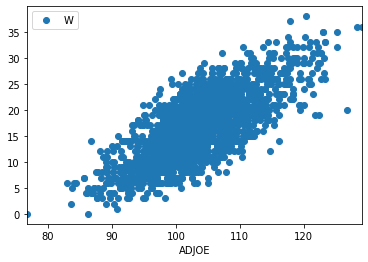

In [26]:
df.plot(x = 'ADJOE', y = 'W', style = 'o')

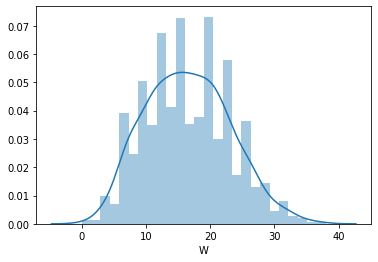

In [29]:
sns.distplot(df['W'])

In [369]:
lr_model = ols(formula='W~ADJOE', data=df).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     2315.
Date:                Wed, 25 Mar 2020   Prob (F-statistic):          8.40e-323
Time:                        02:32:30   Log-Likelihood:                -5048.8
No. Observations:                1755   AIC:                         1.010e+04
Df Residuals:                    1753   BIC:                         1.011e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -53.4908      1.459    -36.673      0.000     -56.352     -50.630
ADJOE          0.6761      0.014     48.117      0.000       0.649       0.704
==============================================================================
Omnibus:                       18.842   Durbin-Watson:                   1.590
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.270
Skew:                           0.123   Prob(JB):                     0.000797
Kurtosis:                       2.633   Cond. No.                     1.48e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
X = df['ADJOE'].values.reshape(-1,1)
Y = df['W'].values.reshape(-1,1)

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [37]:
lr = LinearRegression()

In [38]:
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
print(lr.intercept_)

[-51.95429045]


In [40]:
print(lr.coef_)

[[0.66133474]]


In [45]:
W_pred_adjoe = (lr.predict(X_test))

In [46]:
W_pred_adjoe

array([[13.05491494],
       [12.39358019],
       [14.11305053],
       [20.99093187],
       [10.47570943],
       [15.50185349],
       [15.96478781],
       [12.45971367],
       [16.69225603],
       [25.55414161],
       [17.2874573 ],
       [18.87466069],
       [10.74024333],
       [ 7.89650393],
       [18.87466069],
       [11.0709107 ],
       [20.26346365],
       [16.29545518],
       [12.85651451],
       [21.05706535],
       [17.2874573 ],
       [15.10505264],
       [29.38988313],
       [17.68425815],
       [11.73224545],
       [11.66611197],
       [24.82667339],
       [15.70025391],
       [18.41172637],
       [18.87466069],
       [20.79253145],
       [17.35359078],
       [15.50185349],
       [12.06291282],
       [14.64211832],
       [19.60212891],
       [14.84051875],
       [14.90665222],
       [12.52584714],
       [ 9.020773  ],
       [16.69225603],
       [15.36958654],
       [12.79038104],
       [11.99677935],
       [16.03092129],
       [14

In [50]:
W_pred_adjoe_df = pd.DataFrame({'Actual': Y_test.flatten(), 'LR Prediction': W_pred_adjoe.flatten()})

In [51]:
W_pred_adjoe_df

,Actual,LR Prediction
0,11,13.054915
1,16,12.393580
2,15,14.113051
3,25,20.990932
4,11,10.475709
...,...,...
347,6,13.319449
348,20,20.990932
349,19,23.041070
350,4,12.129046


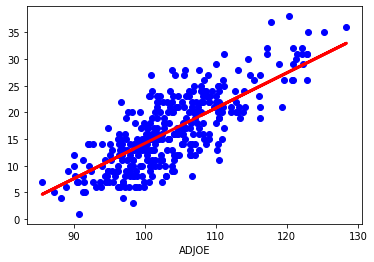

In [73]:
plt.scatter(X_test, Y_test, color = 'blue')
plt.plot(X_test, W_pred_adjoe, color = 'red', linewidth = 3)
plt.xlabel('ADJOE')
plt.show()

In [74]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, W_pred_adjoe))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, W_pred_adjoe))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, W_pred_adjoe)))

Mean Absolute Error: 3.4531240910552685
Mean Squared Error: 18.517367537102768
Root Mean Squared Error: 4.3031810950856775


## Difference in descriptive statistics each year

### Wins Statistics 

In [299]:
csv_2015 = pd.read_csv('file:///Users/chrisfiorentine/Downloads/college-basketball-dataset%20(1)/cbb15.csv')

In [300]:
df_2015 = pd.DataFrame(csv_2015)

In [301]:
wins_stats_2015 = df_2015['W'].describe()
wins_stats_2015
df_wins_stats_2015 = pd.DataFrame(wins_stats_2015)

In [302]:
csv_2016 = pd.read_csv('file:///Users/chrisfiorentine/Downloads/college-basketball-dataset%20(1)/cbb16.csv')

In [303]:
df_2016 = pd.DataFrame(csv_2016)

In [304]:
wins_stats_2016 = df_2016['W'].describe()
df_wins_stats_2016 = pd.DataFrame(wins_stats_2016)

In [305]:
csv_2017 = pd.read_csv('file:///Users/chrisfiorentine/Downloads/college-basketball-dataset%20(1)/cbb17.csv')

In [306]:
df_2017 = pd.DataFrame(csv_2017)

In [307]:
wins_stats_2017 = df_2017['W'].describe()
wins_stats_2017
df_wins_stats_2017 = pd.DataFrame(wins_stats_2017)

In [308]:
csv_2018 = pd.read_csv('file:///Users/chrisfiorentine/Downloads/college-basketball-dataset%20(1)/cbb18.csv')

In [309]:
df_2018 = pd.DataFrame(csv_2018)

In [310]:
wins_stats_2018 = df_2018['W'].describe()
wins_stats_2018
df_wins_stats_2018 = pd.DataFrame(wins_stats_2018)

In [311]:
csv_2019 = pd.read_csv('file:///Users/chrisfiorentine/Downloads/college-basketball-dataset%20(1)/cbb19.csv')

In [312]:
df_2019 = pd.DataFrame(csv_2019)

In [313]:
wins_stats_2019 = df_2019['W'].describe()
wins_stats_2019
df_wins_stats_2019 = pd.DataFrame(wins_stats_2019)

In [314]:
wins_stats = df['W'].describe()
wins_stats
df_wins_stats = pd.DataFrame(wins_stats)

In [315]:
df_all_wins_stats = pd.concat([df_wins_stats_2019,df_wins_stats_2018, df_wins_stats_2017,df_wins_stats_2016,df_wins_stats_2015,df_wins_stats], axis = 1)
df_all_wins_stats

,W,W,W,W,W,W
count,353.000000,351.000000,351.000000,351.000000,351.000000,1755.000000
mean,17.113314,17.068376,17.002849,15.712251,15.666667,16.517379
std,6.374993,6.368305,6.456226,6.686006,6.698401,6.547442
min,3.000000,3.000000,2.000000,1.000000,0.000000,0.000000
25%,12.000000,12.000000,12.000000,10.000000,11.000000,12.000000
50%,17.000000,17.000000,17.000000,16.000000,15.000000,16.000000
75%,21.000000,21.000000,21.000000,21.000000,20.000000,21.000000
max,35.000000,36.000000,37.000000,35.000000,38.000000,38.000000


### Games Statistics 

In [316]:
games_stats = df['G'].describe()
games_stats
df_game_stats = pd.DataFrame(games_stats)

In [317]:
games_stats_2015 = df_2015['G'].describe()
games_stats_2015
df_game_stats_2015 = pd.DataFrame(games_stats_2015)

In [318]:
games_stats_2016 = df_2016['G'].describe()
games_stats_2016
df_game_stats_2016 = pd.DataFrame(games_stats_2016)

In [319]:
games_stats_2017 = df_2017['G'].describe()
games_stats_2017
df_game_stats_2017 = pd.DataFrame(games_stats_2017)

In [320]:
games_stats_2018 = df_2018['G'].describe()
games_stats_2018
df_game_stats_2018 = pd.DataFrame(games_stats_2018)

In [321]:
games_stats_2019 = df_2019['G'].describe()
games_stats_2019
df_game_stats_2019 = pd.DataFrame(games_stats_2019)

In [322]:
df_all_game_stats = pd.concat([df_game_stats_2019,df_game_stats_2018, df_game_stats_2017,df_game_stats_2016,df_game_stats_2015,df_game_stats], axis = 1)
df_all_game_stats

,G,G,G,G,G,G
count,353.000000,351.000000,351.000000,351.000000,351.000000,1755.000000
mean,31.745042,31.566952,31.538462,31.430199,31.333333,31.527066
std,2.514195,2.615436,2.611639,2.606607,2.660827,2.601362
min,26.000000,24.000000,25.000000,24.000000,24.000000,24.000000
25%,30.000000,30.000000,30.000000,30.000000,29.000000,30.000000
50%,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
75%,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
max,39.000000,40.000000,39.000000,40.000000,40.000000,40.000000


### ADJOE Statistics 

In [160]:
adjoe_stats = df['ADJOE'].describe()
adjoe_stats
df_adjoe_stats = pd.DataFrame(adjoe_stats)

In [168]:
adjoe_stats_2015 = df_2015['ADJOE'].describe()
adjoe_stats_2015
df_adjoe_stats_2015 = pd.DataFrame(adjoe_stats_2015)

In [167]:
adjoe_stats_2016 = df_2016['ADJOE'].describe()
adjoe_stats_2016
df_adjoe_stats_2016 = pd.DataFrame(adjoe_stats_2016)

In [169]:
adjoe_stats_2017 = df_2017['ADJOE'].describe()
adjoe_stats_2017
df_adjoe_stats_2017 = pd.DataFrame(adjoe_stats_2017)

In [170]:
adjoe_stats_2018 = df_2018['ADJOE'].describe()
adjoe_stats_2018
df_adjoe_stats_2018 = pd.DataFrame(adjoe_stats_2018)

In [171]:
adjoe_stats_2019 = df_2019['ADJOE'].describe()
adjoe_stats_2019
df_adjoe_stats_2019 = pd.DataFrame(adjoe_stats_2019)

In [323]:
df_all_adjoe_stats = pd.concat([df_adjoe_stats_2019,df_adjoe_stats_2018, df_adjoe_stats_2017,df_adjoe_stats_2016,df_adjoe_stats_2015,df_adjoe_stats], axis = 1)
df_all_adjoe_stats

,ADJOE,ADJOE,ADJOE,ADJOE,ADJOE,ADJOE
count,353.000000,351.000000,351.000000,351.000000,351.000000,1757.000000
mean,103.335977,104.354986,103.840456,103.866382,102.315385,103.542402
std,7.020019,7.175631,7.334709,7.462340,7.401505,7.304975
min,83.700000,86.200000,84.000000,82.900000,76.700000,76.700000
25%,98.600000,99.050000,98.850000,99.050000,97.900000,98.600000
50%,103.100000,104.100000,103.100000,103.200000,102.100000,103.100000
75%,107.700000,108.800000,108.300000,109.000000,106.500000,108.100000
max,123.400000,128.400000,126.800000,123.300000,129.100000,129.100000


### ADJDE Statistics 

In [366]:
df_adjde_stats = pd.DataFrame(df['ADJDE'].describe())

In [364]:
adjde_stats_2015 = df_2015['ADJDE'].describe()
df_adjde_stats_2015 = pd.DataFrame(adjde_stats_2015)

In [363]:
adjde_stats_2016 = df_2016['ADJDE'].describe()
df_adjde_stats_2016 = pd.DataFrame(adjde_stats_2016)

In [362]:
adjde_stats_2017 = df_2017['ADJDE'].describe()
df_adjde_stats_2017 = pd.DataFrame(adjde_stats_2017)

In [361]:
adjde_stats_2018 = df_2018['ADJDE'].describe()
df_adjde_stats_2018 = pd.DataFrame(adjde_stats_2018)

In [146]:
df_adjde_stats_2018 = pd.DataFrame(adjde_stats_2018)

In [360]:
adjde_stats_2019 = df_2019['ADJDE'].describe()
df_adjde_stats_2019 = pd.DataFrame(adjde_stats_2019)

In [163]:
df_adjde_stats = pd.DataFrame(df['ADJDE'].describe()

In [367]:
df_all_adjde_stats = pd.concat([df_adjde_stats_2019,df_adjde_stats_2018, df_adjde_stats_2017,df_adjde_stats_2016,df_adjde_stats_2015,df_adjde_stats], axis = 1)
df_all_adjde_stats

,ADJDE,ADJDE,ADJDE,ADJDE,ADJDE,ADJDE
count,353.000000,351.000000,351.000000,351.000000,351.000000,1755.000000
mean,103.336261,104.357265,103.841880,103.866382,102.311681,103.539487
std,6.452597,6.300789,6.591266,6.325834,6.537436,6.475605
min,85.200000,86.700000,86.300000,87.800000,84.000000,84.000000
25%,98.700000,99.850000,99.500000,99.100000,97.750000,98.900000
50%,104.000000,104.400000,103.700000,103.800000,102.600000,103.800000
75%,107.800000,108.300000,108.250000,108.400000,107.100000,108.000000
max,119.200000,123.000000,124.000000,118.200000,120.000000,124.000000


### Tempo Statistics

In [329]:
df_tempo_stats = pd.DataFrame(df['ADJ_T'].describe())

In [330]:
df_tempo_stats_2015 = pd.DataFrame(df_2015['ADJ_T'].describe())

In [331]:
df_tempo_stats_2016 = pd.DataFrame(df_2016['ADJ_T'].describe())

In [332]:
df_tempo_stats_2017 = pd.DataFrame(df_2017['ADJ_T'].describe())

In [333]:
df_tempo_stats_2018 = pd.DataFrame(df_2018['ADJ_T'].describe())

In [334]:
df_tempo_stats_2019 = pd.DataFrame(df_2019['ADJ_T'].describe())

In [336]:
df_all_tempo_stats = pd.concat([df_tempo_stats_2019,df_tempo_stats_2018, df_tempo_stats_2017,df_tempo_stats_2016,df_tempo_stats_2015,df_tempo_stats], axis = 1)
df_all_tempo_stats

,ADJ_T,ADJ_T,ADJ_T,ADJ_T,ADJ_T,ADJ_T
count,353.000000,351.000000,351.000000,351.000000,351.000000,1755.000000
mean,69.168555,69.419373,69.481766,69.100855,64.936467,68.420855
std,2.694397,2.681646,2.917897,2.780478,2.686141,3.260502
min,60.700000,60.500000,60.300000,61.900000,57.200000,57.200000
25%,67.300000,67.500000,67.700000,67.200000,63.300000,66.400000
50%,69.000000,69.400000,69.600000,68.900000,64.900000,68.500000
75%,70.800000,71.000000,71.100000,70.850000,66.600000,70.400000
max,79.100000,83.400000,83.300000,81.900000,77.300000,83.400000


#### Tempo changes in 2015 season because it was before the shot clock went from 35 to 30 seconds, speeding up the tempo of the game. 

### Turnover statistics 

In [371]:
df_tor_stats = pd.DataFrame(df['TOR'].describe())

In [372]:
df_tor_stats_2015 = pd.DataFrame(df_2015['TOR'].describe())

In [376]:
df_tor_stats_2016 = pd.DataFrame(df_2016['TOR'].describe())

In [377]:
df_tor_stats_2017 = pd.DataFrame(df_2017['TOR'].describe())

In [378]:
df_tor_stats_2018 = pd.DataFrame(df_2018['TOR'].describe())

In [379]:
df_tor_stats_2019 = pd.DataFrame(df_2019['TOR'].describe())

In [381]:
df_all_tor_stats = pd.concat([df_tor_stats_2019,df_tor_stats_2018, df_tor_stats_2017,df_tor_stats_2016,df_tor_stats_2015,df_tor_stats], axis = 1)
df_all_tor_stats

,TOR,TOR,TOR,TOR,TOR,TOR
count,353.000000,351.000000,351.000000,351.000000,351.000000,1755.000000
mean,18.606516,18.448718,18.594017,18.184046,19.125641,18.591738
std,2.066711,1.911168,1.893913,1.898790,2.070562,1.992650
min,13.500000,13.500000,13.900000,13.600000,12.400000,12.400000
25%,17.200000,17.200000,17.400000,16.800000,17.800000,17.200000
50%,18.500000,18.500000,18.500000,18.100000,19.200000,18.500000
75%,19.800000,19.600000,19.800000,19.450000,20.300000,19.800000
max,25.100000,24.700000,25.900000,25.400000,26.100000,26.100000


### Free Throw Statistics

In [382]:
df_ft_stats = pd.DataFrame(df['FTR'].describe())

In [383]:
df_ft_stats_2015 = pd.DataFrame(df_2015['FTR'].describe())

In [384]:
df_ft_stats_2016 = pd.DataFrame(df_2016['FTR'].describe())

In [385]:
df_ft_stats_2017 = pd.DataFrame(df_2017['FTR'].describe())

In [386]:
df_ft_stats_2018 = pd.DataFrame(df_2018['FTR'].describe())

In [387]:
df_ft_stats_2019 = pd.DataFrame(df_2019['FTR'].describe())

In [388]:
df_all_ft_stats = pd.concat([df_ft_stats_2019,df_ft_stats_2018, df_ft_stats_2017,df_ft_stats_2016,df_ft_stats_2015,df_ft_stats], axis = 1)
df_all_ft_stats

,FTR,FTR,FTR,FTR,FTR,FTR
count,353.000000,351.000000,351.000000,351.000000,351.000000,1755.000000
mean,32.954391,33.537607,35.328205,36.638177,37.043305,35.101880
std,4.708719,4.485782,4.493351,4.610320,4.747210,4.885879
min,21.900000,21.600000,24.000000,25.500000,26.100000,21.600000
25%,29.900000,30.400000,32.450000,33.300000,33.550000,31.700000
50%,33.300000,33.300000,35.100000,36.800000,36.600000,34.900000
75%,35.900000,36.450000,38.250000,40.200000,40.300000,38.300000
max,48.100000,45.800000,46.000000,49.400000,51.000000,51.000000


### Offensive Rebound Statistics 

In [389]:
df_ORB_stats = pd.DataFrame(df['ORB'].describe())

In [390]:
df_ORB_stats_2015 = pd.DataFrame(df_2015['ORB'].describe())

In [391]:
df_ORB_stats_2016 = pd.DataFrame(df_2016['ORB'].describe())

In [392]:
df_ORB_stats_2017 = pd.DataFrame(df_2017['ORB'].describe())

In [393]:
df_ORB_stats_2018 = pd.DataFrame(df_2018['ORB'].describe())

In [394]:
df_ORB_stats_2019 = pd.DataFrame(df_2019['ORB'].describe())

In [395]:
df_all_ORB_stats = pd.concat([df_ORB_stats_2019,df_ORB_stats_2018, df_ORB_stats_2017,df_ORB_stats_2016,df_ORB_stats_2015,df_ORB_stats], axis = 1)
df_all_ORB_stats

,ORB,ORB,ORB,ORB,ORB,ORB
count,353.000000,351.000000,351.000000,351.000000,351.000000,1755.000000
mean,28.245892,28.543590,29.120798,29.618234,30.862963,29.278519
std,3.938373,3.922602,4.088345,4.109475,3.943029,4.103832
min,15.900000,18.000000,15.000000,17.700000,19.300000,15.000000
25%,25.400000,25.900000,26.750000,26.950000,28.650000,26.600000
50%,28.300000,28.700000,29.300000,29.600000,30.800000,29.400000
75%,31.000000,31.300000,31.600000,32.200000,33.700000,31.900000
max,38.700000,38.800000,41.300000,42.000000,42.100000,42.100000


### Removing 2015 season

In [343]:
df['YEAR'].value_counts()

2019    351
2018    351
2017    351
2016    351
2015    351
Name: YEAR, dtype: int64

In [359]:
years = df.reset_index()
years = years.set_index('YEAR')
years = years.drop(2015)
years = years.reset_index()
df2 = years
df2

,YEAR,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED
0,2016,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,...,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0
1,2018,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,...,30.7,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0
2,2019,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,...,32.9,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0
3,2017,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,...,39.0,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0
4,2019,Virginia,ACC,38,35,123.0,89.9,0.9736,55.2,44.7,...,29.1,26.3,52.5,45.7,39.5,28.9,60.7,11.1,Champions,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399,2018,Texas A&M,SEC,35,22,111.2,94.7,0.8640,51.4,46.9,...,32.0,27.6,52.5,45.7,32.9,32.6,70.3,1.9,S16,7.0
1400,2019,LSU,SEC,35,28,117.9,96.6,0.9081,51.2,49.9,...,37.1,33.1,52.9,49.4,31.9,33.7,71.2,7.3,S16,3.0
1401,2019,Tennessee,SEC,36,31,122.8,95.2,0.9488,55.3,48.1,...,33.3,34.9,55.4,44.7,36.7,35.4,68.8,9.9,S16,2.0
1402,2016,Gonzaga,WCC,35,27,117.4,94.5,0.9238,55.2,44.8,...,34.4,28.1,54.3,44.4,37.8,30.3,68.2,2.1,S16,11.0


### Removing teams that did not play all 5 years 

In [326]:
#pd.DataFrame(df['TEAM'].value_counts()).reset_index()

In [191]:
pd.DataFrame(df['TEAM'].value_counts()).tail(7)

,TEAM
Louisville,5
Fort Wayne,3
Little Rock,3
Arkansas Little Rock,2
IPFW,2
North Alabama,1
Cal Baptist,1


In [245]:
teams = df.set_index('TEAM')
teams.loc['North Alabama']
teams = teams.drop('North Alabama')
teams = teams.drop('Cal Baptist')
teams

,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
TEAM,,,,,,,,,,,,,,,,,,,,,
North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Texas A&M,SEC,35,22,111.2,94.7,0.8640,51.4,46.9,19.2,15.3,...,27.6,52.5,45.7,32.9,32.6,70.3,1.9,S16,7.0,2018
LSU,SEC,35,28,117.9,96.6,0.9081,51.2,49.9,17.9,20.1,...,33.1,52.9,49.4,31.9,33.7,71.2,7.3,S16,3.0,2019
Tennessee,SEC,36,31,122.8,95.2,0.9488,55.3,48.1,15.8,18.0,...,34.9,55.4,44.7,36.7,35.4,68.8,9.9,S16,2.0,2019


In [295]:
df = teams
df

,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
TEAM,,,,,,,,,,,,,,,,,,,,,
North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Texas A&M,SEC,35,22,111.2,94.7,0.8640,51.4,46.9,19.2,15.3,...,27.6,52.5,45.7,32.9,32.6,70.3,1.9,S16,7.0,2018
LSU,SEC,35,28,117.9,96.6,0.9081,51.2,49.9,17.9,20.1,...,33.1,52.9,49.4,31.9,33.7,71.2,7.3,S16,3.0,2019
Tennessee,SEC,36,31,122.8,95.2,0.9488,55.3,48.1,15.8,18.0,...,34.9,55.4,44.7,36.7,35.4,68.8,9.9,S16,2.0,2019


## Possible wins based on ADJOE

In [296]:
pd.DataFrame(df['W'].value_counts())

,W
20,108
14,106
16,99
18,97
12,94
17,91
11,90
15,87
19,80
13,79


### No team has won less than 6 games and had a ADJOE above the average

In [297]:
pd.DataFrame(df.loc[df['W']== 0, 'ADJOE'])

,ADJOE
TEAM,
San Jose St.,86.2
Grambling St.,76.7


In [298]:
pd.DataFrame(df.loc[df['W']== 1, 'ADJOE'])

,ADJOE
TEAM,
Chicago St.,90.8


In [268]:
pd.DataFrame(teams.loc[teams['W']== 2, 'ADJOE'])

,ADJOE
TEAM,
Florida A&M,83.6
Central Arkansas,89.1
Alabama A&M,90.4


In [267]:
pd.DataFrame(teams.loc[teams['W']== 3, 'ADJOE'])

,ADJOE
TEAM,
Maine,92.3
Northern Arizona,92.6
Illinois Chicago,89.7
North Carolina A&T,95.2
Bryant,98.3
Tennessee St.,87.6
Southeast Missouri St.,91.0
Alabama A&M,87.6
Chicago St.,94.9


In [266]:
pd.DataFrame(teams.loc[teams['W']== 4, 'ADJOE'])

,ADJOE
TEAM,
UMBC,87.0
Tulane,97.0
Southern Utah,97.3
Liberty,89.8
UNC Asheville,93.1
UTSA,96.9
Delaware St.,90.3
Bradley,86.1
San Jose St.,95.5


In [265]:
pd.DataFrame(teams.loc[teams['W']== 5, 'ADJOE'])

,ADJOE
TEAM,
Binghamton,91.4
Maine,93.0
New Hampshire,83.7
Kennesaw St.,91.2
Idaho St.,96.2
Northern Arizona,92.2
Idaho,94.5
Presbyterian,87.2
USC Upstate,92.7


In [264]:
pd.DataFrame(teams.loc[teams['W']== 6, 'ADJOE'])

,ADJOE
TEAM,
Maine,91.0
Tulane,103.3
Stetson,93.9
Rutgers,97.5
Montana St.,94.7
North Dakota,96.1
Idaho St.,97.6
Southern Utah,100.5
Presbyterian,94.8


### No team has won more than 27 games while having a ADJOE below the average.

In [271]:
pd.DataFrame(teams.loc[teams['W']== 38, 'ADJOE'])

,ADJOE
TEAM,
Kentucky,120.3


In [272]:
pd.DataFrame(teams.loc[teams['W']== 37, 'ADJOE'])

,ADJOE
TEAM,
Gonzaga,117.8


In [273]:
pd.DataFrame(teams.loc[teams['W']== 36, 'ADJOE'])

,ADJOE
TEAM,
Wisconsin,129.1
Villanova,128.4


In [274]:
pd.DataFrame(teams.loc[teams['W']== 35, 'ADJOE'])

,ADJOE
TEAM,
Duke,125.2
Virginia,123.0
Villanova,123.1


In [275]:
pd.DataFrame(teams.loc[teams['W']== 34, 'ADJOE'])

,ADJOE
TEAM,
Arizona,117.5
Gonzaga,120.2


In [276]:
pd.DataFrame(teams.loc[teams['W']== 33, 'ADJOE'])

,ADJOE
TEAM,
North Carolina,123.3
Michigan,114.4
North Carolina,121.0
Gonzaga,123.4
Oregon,117.8
Villanova,121.9
Houston,115.7


In [277]:
pd.DataFrame(teams.loc[teams['W']== 32, 'ADJOE'])

,ADJOE
TEAM,
Notre Dame,125.3
Duke,118.9
Kansas,120.9
Kentucky,118.3
Michigan St.,119.9
Loyola Chicago,110.5
Villanova,122.2
Buffalo,113.6
Arizona,117.6


In [278]:
pd.DataFrame(teams.loc[teams['W']== 31, 'ADJOE'])

,ADJOE
TEAM,
Texas Tech,115.2
Kansas,121.5
Kansas,122.1
Cincinnati,111.6
UC Irvine,107.2
Middle Tennessee,111.2
Northern Iowa,115.4
Wichita St.,117.2
Virginia,114.6


In [279]:
pd.DataFrame(teams.loc[teams['W']== 30, 'ADJOE'])

,ADJOE
TEAM,
Oregon,118.4
Kentucky,117.5
Auburn,121.3
Saint Mary's,118.7
Virginia,112.1
Cincinnati,115.2
Michigan St.,118.9
Wofford,116.4
SMU,120.0


In [280]:
pd.DataFrame(teams.loc[teams['W']== 29, 'ADJOE'])

,ADJOE
TEAM,
Virginia,119.9
Duke,122.3
Oklahoma,118.2
Lipscomb,110.2
UNC Greensboro,104.4
Xavier,120.9
Liberty,109.2
Saint Mary's,118.0
Vermont,110.0


In [281]:
pd.DataFrame(teams.loc[teams['W']== 28, 'ADJOE'])

,ADJOE
TEAM,
George Washington,114.9
Valparaiso,106.6
Monmouth,105.7
Illinois St.,107.5
Saint Mary's,117.6
Saint Joseph's,114.2
Duke,122.1
Maryland,110.2
Xavier,117.0


In [284]:
pd.DataFrame(teams.loc[teams['W']== 27, 'ADJOE'])

,ADJOE
TEAM,
Louisville,109.4
Texas Tech,112.7
Florida,116.6
Michigan St.,116.3
Vermont,110.7
Hofstra,114.7
Old Dominion,104.3
Western Kentucky,113.8
Monmouth,106.7


In [399]:
df2 = df2.drop('SEED', axis = 1)
df2.corr()


,YEAR,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB
YEAR,1.000000,0.044869,0.074727,-0.015595,-0.019547,0.002699,0.110496,0.116838,0.064292,0.058436,-0.129586,-0.179767,-0.298665,-0.256708,0.162630,0.169876,-0.025533,-0.042429,0.005342,0.001001
G,0.044869,1.000000,0.694705,0.610558,-0.606703,0.684418,0.351716,-0.490255,-0.324671,0.068702,0.276570,-0.169885,0.092446,-0.276926,0.343157,-0.448185,0.219800,-0.348671,-0.073531,0.666259
W,0.074727,0.694705,1.000000,0.740514,-0.697799,0.808181,0.624310,-0.629057,-0.437347,0.163191,0.315341,-0.363837,0.127313,-0.309860,0.586270,-0.542506,0.431634,-0.500187,-0.056146,0.901621
ADJOE,-0.015595,0.610558,0.740514,1.000000,-0.541483,0.876807,0.733537,-0.350110,-0.584136,-0.100730,0.289003,-0.245202,0.071715,-0.372751,0.637265,-0.346016,0.577587,-0.201974,0.039237,0.852265
ADJDE,-0.019547,-0.606703,-0.697799,-0.541483,1.000000,-0.855734,-0.263264,0.790069,0.220402,-0.228986,-0.274805,0.382378,-0.099341,0.195082,-0.286839,0.723194,-0.132151,0.560468,0.216579,-0.817212
BARTHAG,0.002699,0.684418,0.808181,0.876807,-0.855734,1.000000,0.566286,-0.633003,-0.464253,0.058441,0.316257,-0.344801,0.104974,-0.328364,0.526572,-0.593415,0.400957,-0.423560,-0.092709,0.942995
EFG_O,0.110496,0.351716,0.624310,0.733537,-0.263264,0.566286,1.000000,-0.168340,-0.343527,-0.129126,-0.105700,-0.313087,-0.078250,-0.403515,0.886873,-0.147216,0.753593,-0.129936,0.039472,0.578105
EFG_D,0.116838,-0.490255,-0.629057,-0.350110,0.790069,-0.633003,-0.168340,1.000000,0.109156,0.002487,-0.311124,0.234388,-0.177026,0.127127,-0.192165,0.901307,-0.075530,0.724110,0.207251,-0.641569
TOR,0.064292,-0.324671,-0.437347,-0.584136,0.220402,-0.464253,-0.343527,0.109156,1.000000,0.082968,0.127650,0.143430,0.133755,0.295316,-0.259373,0.097430,-0.314963,0.071774,-0.042806,-0.453561
TORD,0.058436,0.068702,0.163191,-0.100730,-0.228986,0.058441,-0.129126,0.002487,0.082968,1.000000,0.107393,0.261572,0.092726,0.382018,-0.066818,0.055426,-0.156618,-0.101071,-0.003968,0.106812
